In [39]:
import pandas as pd
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [40]:
game_tweeters = pd.read_csv("Games.csv", dtype=str)

for index, row in game_tweeters.iterrows():

    try:
        target_user = row["Screen Name"]
        
        user_account = api.get_user(target_user)
        user_real_name = user_account["name"]

        user_tweets = user_account["statuses_count"]
        user_followers = user_account["followers_count"]
        user_following = user_account["friends_count"]
        user_favorites = user_account["favourites_count"]
        user_created = user_account["created_at"]

        game_tweeters.at[index, "Real Name"] = user_real_name
        game_tweeters.at[index, "Tweets"] = user_tweets
        game_tweeters.at[index, "Followers"] = user_followers
        game_tweeters.at[index, "Following"] = user_following
        game_tweeters.at[index, "Favorites Count"] = user_favorites
        game_tweeters.at[index, "Date Created"] = user_created
    except tweepy.TweepError as e:
        print(f"exception for {row['Screen Name']}: {e}")
        game_tweeters.drop(index=index,inplace=True)

game_tweeters.sort_values("Followers", ascending=False).head(10)

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count,Date Created
8,RockstarGames,Rockstar Games,15853,9313320,1234,4616,Wed Apr 08 16:47:30 +0000 2009
0,fortnitegame,Fortnite,9656,5643528,175,2625,Thu Dec 01 14:57:32 +0000 2011
1,LeagueOfLegends,League of Legends,6265,4355312,401,2858,Fri May 11 19:35:35 +0000 2012
6,CallofDuty,Call of Duty,17309,3512736,10,12968,Fri Apr 29 18:40:55 +0000 2011
3,PlayOverwatch,Overwatch,122368,3153209,242,7691,Mon Mar 31 18:43:24 +0000 2014
7,DestinyTheGame,Destiny The Game,3162,2300824,21,1688,Wed Nov 14 20:24:48 +0000 2012
4,Warcraft,World of Warcraft,26189,1494739,233,20721,Tue Jul 28 22:05:29 +0000 2009
5,Rainbow6Game,Rainbow Six Siege,27554,1278061,606,4914,Thu Oct 27 13:05:31 +0000 2011
2,PlayHearthstone,Hearthstone,17388,885043,79,4349,Fri Feb 22 19:47:03 +0000 2013


Text(0,0.5,'Followers')

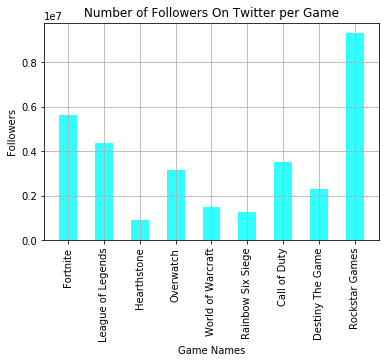

In [44]:
plt.bar(game_tweeters['Real Name'], game_tweeters['Followers'], facecolor = "cyan", alpha = 0.8, align = "center", width = 0.5)
plt.xticks(rotation=90)
plt.grid()
plt.title("Number of Followers On Twitter per Game")
plt.xlabel("Game Names")
plt.ylabel("Followers")